In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from fbprophet import Prophet

In [28]:
#importam data setul nostru
df = pd.read_excel('temp minima.xlsx')
df

,ds,y
0,2015-01-01,-21.5
1,2015-01-02,-18.0
2,2015-01-03,-10.0
3,2015-01-04,-8.0
4,2015-01-05,-6.0
...,...,...
2187,2020-12-27,2.5
2188,2020-12-28,3.0
2189,2020-12-29,10.0
2190,2020-12-30,13.5


In [29]:
# fit model
m = Prophet()
m.fit(df);

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [30]:
#facem predictia cu coloana ds pe viitor cu 365 de zile
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
2552,2021-12-27
2553,2021-12-28
2554,2021-12-29
2555,2021-12-30
2556,2021-12-31


In [31]:
# face preveziuni pentru valori joase si valori inalte
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2552,2021-12-27,3.601682,-1.044816,8.195319
2553,2021-12-28,3.429404,-1.521456,8.446748
2554,2021-12-29,3.097797,-1.221001,7.761807
2555,2021-12-30,2.779734,-1.820073,7.417709
2556,2021-12-31,2.643946,-1.974726,7.458846


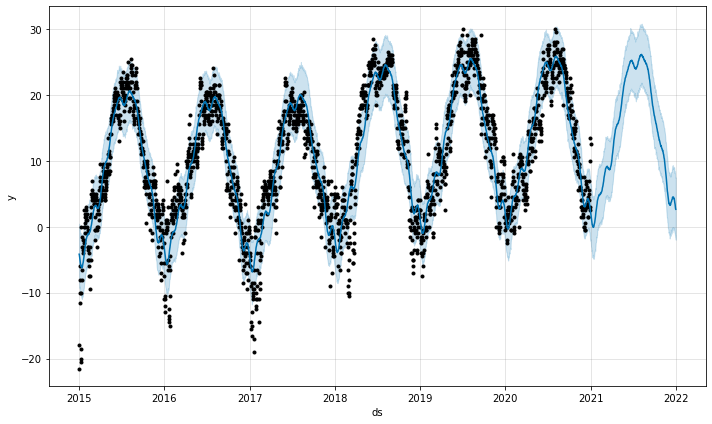

In [32]:
# afisam prognoza
fig1 = m.plot(forecast)
plt.savefig("temperaturi_minime.png")

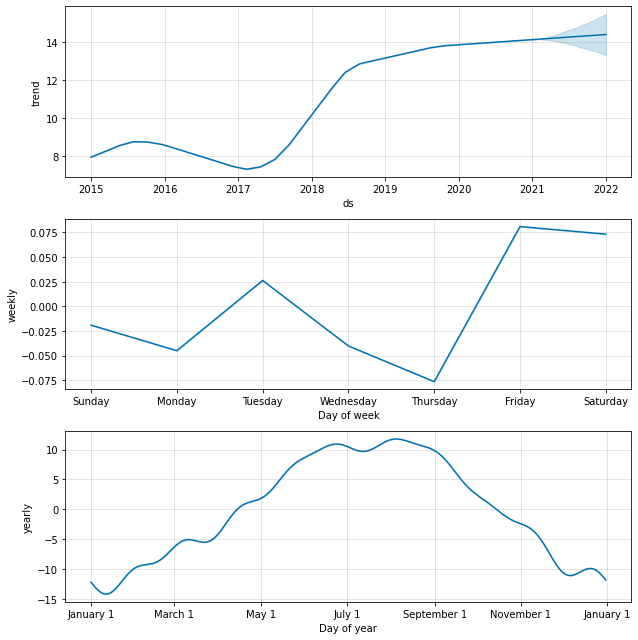

In [33]:
fig2 = m.plot_components(forecast)
plt.savefig("grafic_minime.png")

In [34]:
import pickle

In [35]:
forecast.to_excel('temperaturi_minime_prophet.xlsx')

In [36]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01,7.960330,-8.529346,0.477554,7.960330,7.960330,-12.127517,-12.127517,-12.127517,-0.076372,-0.076372,-0.076372,-12.051145,-12.051145,-12.051145,0.0,0.0,0.0,-4.167186
1,2015-01-02,7.964674,-9.248944,0.025755,7.964674,7.964674,-12.269659,-12.269659,-12.269659,0.080964,0.080964,0.080964,-12.350624,-12.350624,-12.350624,0.0,0.0,0.0,-4.304985
2,2015-01-03,7.969017,-9.070768,-0.055579,7.969017,7.969017,-12.571686,-12.571686,-12.571686,0.073277,0.073277,0.073277,-12.644963,-12.644963,-12.644963,0.0,0.0,0.0,-4.602669
3,2015-01-04,7.973361,-9.573119,-0.324032,7.973361,7.973361,-12.947156,-12.947156,-12.947156,-0.019060,-0.019060,-0.019060,-12.928096,-12.928096,-12.928096,0.0,0.0,0.0,-4.973795
4,2015-01-05,7.977705,-9.702780,-0.983096,7.977705,7.977705,-13.239081,-13.239081,-13.239081,-0.044944,-0.044944,-0.044944,-13.194137,-13.194137,-13.194137,0.0,0.0,0.0,-5.261376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552,2021-12-27,14.386899,-1.044816,8.195319,13.327356,15.447971,-10.785217,-10.785217,-10.785217,-0.044944,-0.044944,-0.044944,-10.740273,-10.740273,-10.740273,0.0,0.0,0.0,3.601682
2553,2021-12-28,14.387629,-1.521456,8.446748,13.322009,15.450609,-10.958225,-10.958225,-10.958225,0.026296,0.026296,0.026296,-10.984521,-10.984521,-10.984521,0.0,0.0,0.0,3.429404
2554,2021-12-29,14.388359,-1.221001,7.761807,13.313866,15.453176,-11.290562,-11.290562,-11.290562,-0.040162,-0.040162,-0.040162,-11.250400,-11.250400,-11.250400,0.0,0.0,0.0,3.097797
2555,2021-12-30,14.389088,-1.820073,7.417709,13.313618,15.455743,-11.609354,-11.609354,-11.609354,-0.076372,-0.076372,-0.076372,-11.532982,-11.532982,-11.532982,0.0,0.0,0.0,2.779734
